# **KNN METHOD**

**Imports**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import matthews_corrcoef, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

**Load the Dataset**

In [2]:

data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Prepare Dataset**

In [8]:
# Separate features and target variable
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train KNN Classifier**

In [9]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Make Predictions**

In [10]:
y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]  # Probability predictions

**Evaluation Metrics**

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy (%):", accuracy * 100)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Scaled Confusion Matrix (e.g. if total should be 230)
scaling_factor = 230 / np.sum(cm)
scaled_cm = cm * scaling_factor
print("\nScaled Confusion Matrix (230 instances):")
print(scaled_cm)

# Training and Test Accuracy
acc_train = accuracy_score(y_train, knn.predict(X_train))
acc_test = knn.score(X_test, y_test)
print("\nTraining Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))


Accuracy: 0.7229437229437229
Accuracy (%): 72.2943722943723

Confusion Matrix:
[[125  34]
 [ 30  42]]

Scaled Confusion Matrix (230 instances):
[[124.45887446  33.85281385]
 [ 29.87012987  41.81818182]]

Training Accuracy: 0.82
Test Accuracy: 0.72


**Detailed Error Metrics**

In [12]:
TN, FP, FN, TP = cm.ravel()

# Rates
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TPR = TP / (TP + FN)   # Sensitivity / Recall
TNR = TN / (TN + FP)   # Specificity

print("\nFalse Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Error Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rae = mae / (abs(y_test - y_test.mean()).sum())
rrse = np.sqrt(mse / ((y_test - y_test.mean()) ** 2).sum())

print("MAE:", mae)
print("RMSE:", rmse)
print("RAE:", rae)
print("RRSE:", rrse)


False Positive Rate (FPR): 0.2138364779874214
False Negative Rate (FNR): 0.4166666666666667
True Positive Rate (TPR): 0.5833333333333334
True Negative Rate (TNR): 0.7861635220125787

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       159
           1       0.55      0.58      0.57        72

    accuracy                           0.72       231
   macro avg       0.68      0.68      0.68       231
weighted avg       0.73      0.72      0.72       231

MAE: 0.27705627705627706
RMSE: 0.5263613559678152
RAE: 0.0027952480782669456
RRSE: 0.0747696205456059


**Advanced Metrics**

In [13]:
# MCC
mcc = matthews_corrcoef(y_test, np.round(y_pred_prob))
print("MCC:", mcc)

# ROC and PRC Curves
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
prc_auc = auc(recall, precision)
print("PRC AUC:", prc_auc)


MCC: 0.3642528108283687
ROC AUC: 0.7546733053808525
PRC AUC: 0.5666058244716261


**Plotting Curves**

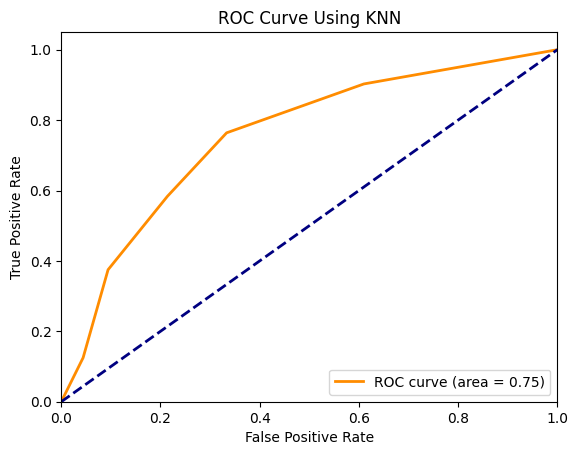

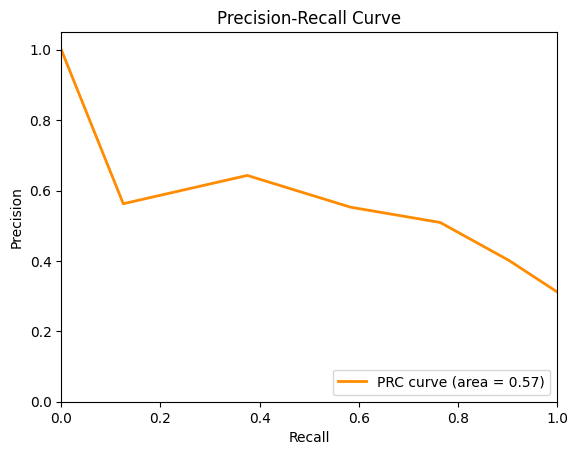

In [14]:
# ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using KNN')
plt.legend(loc="lower right")
plt.savefig("KNN_ROC.jpg")
plt.show()

# PRC Curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

**Weighted Metrics by Class**

In [15]:
# Ravel again just for clarity
tn, fp, fn, tp = cm.ravel()
tn0, fp0, fn0, tp0 = cm.ravel()           # Class 0
tn1, fp1, fn1, tp1 = cm.ravel()[::-1]     # Class 1 (flipped)

tp_rate0 = tp0 / (tp0 + fn0)
fp_rate0 = fp0 / (fp0 + tn0)
tp_rate1 = tp1 / (tp1 + fn1)
fp_rate1 = fp1 / (fp1 + tn1)

print("\ntp_rate0:", tp_rate0)
print("tp_rate1:", tp_rate1)
print("fp_rate0:", fp_rate0)
print("fp_rate1:", fp_rate1)

# Weighted TP/FP
weighted_tp = tp * 0.7
weighted_fp = fp * 0.3

weighted_tp_rate_avg = (tp_rate0 + tp_rate1) / 2
weighted_fp_rate_avg = (fp_rate0 + fp_rate1) / 2
print("Weighted TP Rate (average):", weighted_tp_rate_avg)
print("Weighted FP Rate (average):", weighted_fp_rate_avg)

# Weighted TP and FP rate based on total predictions
weighted_tp_rate = weighted_tp / (weighted_tp + fn)
weighted_fp_rate = weighted_fp / (weighted_fp + tn)

print("Weighted TP Rate (adjusted):", weighted_tp_rate)
print("Weighted FP Rate (adjusted):", weighted_fp_rate)



tp_rate0: 0.5833333333333334
tp_rate1: 0.7861635220125787
fp_rate0: 0.2138364779874214
fp_rate1: 0.4166666666666667
Weighted TP Rate (average): 0.6847484276729561
Weighted FP Rate (average): 0.31525157232704404
Weighted TP Rate (adjusted): 0.4949494949494949
Weighted FP Rate (adjusted): 0.07544378698224852


# **Logistic Regression**

**Imports**

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, mean_absolute_error, mean_squared_error, accuracy_score,
    classification_report, matthews_corrcoef, roc_curve, precision_recall_curve, auc
)


**Load Dataset**

In [25]:
def main():
    # === 1. Load and Explore Dataset ===
    url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
    column_names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
    dataset = pd.read_csv(url, names=column_names)

    print("\nDataset Preview:")
    print(dataset.head())
    print("\nDataset Description:")
    print(dataset.describe())
    print("\nMissing Values Check:")
    print(dataset.isnull().sum())
    print("\nDataset Info:")
    print(dataset.info())
    X = dataset.iloc[:, :-1].values
    y = dataset.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=30
    )



**Train Logistic Regression Model**

In [26]:
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

**Predict and Evaluate**

In [28]:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    print("\nConfusion Matrix:")
    print(cm)

    # Scale confusion matrix to 230 samples (hypothetical example)
    scale_factor = 230 / np.sum(cm)
    scaled_cm = cm * scale_factor
    print("\nScaled Confusion Matrix (230 instances):")
    print(scaled_cm)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("\nOverall Accuracy: {:.2f}%".format(accuracy * 100))

    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = model.score(X_test, y_test)
    print("Training Accuracy: {:.2f}".format(train_acc))
    print("Test Accuracy: {:.2f}".format(test_acc))



Confusion Matrix:
[[139  20]
 [ 27  45]]

Scaled Confusion Matrix (230 instances):
[[138.3982684   19.91341991]
 [ 26.88311688  44.80519481]]

Overall Accuracy: 79.65%
Training Accuracy: 0.76
Test Accuracy: 0.80


**Error Rates**

In [29]:
    TN, FP, FN, TP = cm.ravel()
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)

    print("\nError Rates:")
    print(f"False Positive Rate (FPR): {FPR:.4f}")
    print(f"False Negative Rate (FNR): {FNR:.4f}")
    print(f"True Positive Rate (TPR / Recall): {TPR:.4f}")
    print(f"True Negative Rate (TNR): {TNR:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Error Rates:
False Positive Rate (FPR): 0.1258
False Negative Rate (FNR): 0.3750
True Positive Rate (TPR / Recall): 0.6250
True Negative Rate (TNR): 0.8742

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       159
           1       0.69      0.62      0.66        72

    accuracy                           0.80       231
   macro avg       0.76      0.75      0.76       231
weighted avg       0.79      0.80      0.79       231



**Regression-Like Metrics**

In [30]:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print("\nRegression Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")



Regression Metrics:
Mean Absolute Error (MAE): 0.2035
Root Mean Squared Error (RMSE): 0.4511


**Advanced Metrics**

In [32]:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    mcc = matthews_corrcoef(y_test, np.round(y_pred_proba))

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    prc_auc = auc(recall, precision)
    print("\nAdvanced Metrics:")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"PRC AUC: {prc_auc:.4f}")




Advanced Metrics:
Matthews Correlation Coefficient (MCC): 0.5142
ROC AUC: 0.8437
PRC AUC: 0.6992


**Visualization**

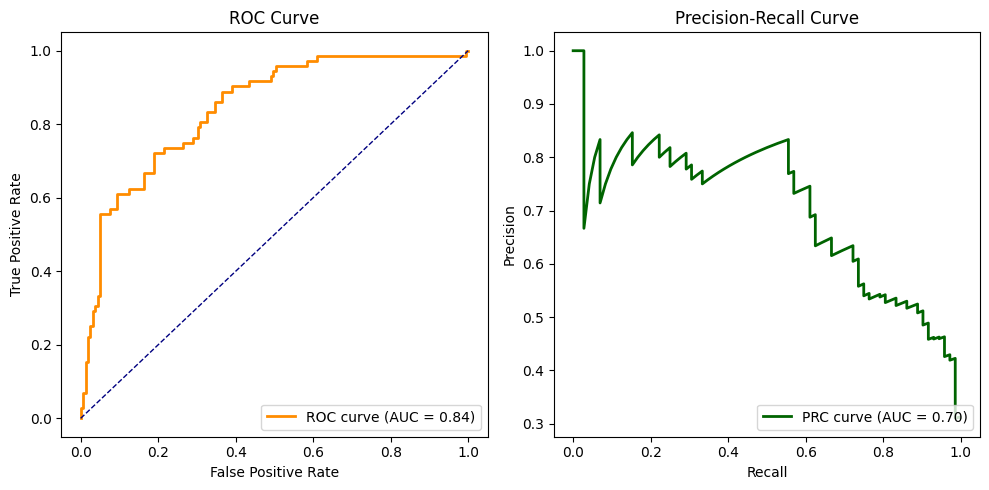

In [33]:
    plt.figure(figsize=(10, 5))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")

    # PRC Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='darkgreen', lw=2, label=f'PRC curve (AUC = {prc_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.savefig("model_performance_curves.jpg")
    plt.show()

**Weighted Rate Example**

In [35]:
    weighted_tp = TP * 0.7
    weighted_fp = FP * 0.3
    weighted_tp_rate = weighted_tp / (weighted_tp + FN)
    weighted_fp_rate = weighted_fp / (weighted_fp + TN)

    print("\nWeighted Rates (Example):")
    print(f"Weighted TP Rate: {weighted_tp_rate:.4f}")
    print(f"Weighted FP Rate: {weighted_fp_rate:.4f}")




Weighted Rates (Example):
Weighted TP Rate: 0.5385
Weighted FP Rate: 0.0414


# **Naive Bayes Classifier**

**Imports**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, matthews_corrcoef,
    roc_curve, precision_recall_curve, auc
)


**Load Dataset and Inspect**

In [49]:
    data = pd.read_csv('diabetes.csv')
    print("\nDataset Preview:")
    print(data.head())


Dataset Preview:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Prepare Data**

In [41]:
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

**Train Naive Bayes Model**

In [42]:
    model = GaussianNB()
    model.fit(X_train, y_train)

GaussianNB()

**Confusion Matrix**

In [43]:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("\n Confusion Matrix:")
    print(cm)



 Confusion Matrix:
[[133  26]
 [ 28  44]]


**Accuracy and Error Rates**

In [44]:
    accuracy = accuracy_score(y_test, y_pred)
    print("\n Accuracy: {:.2f}%".format(accuracy * 100))

    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_test = model.score(X_test, y_test)
    print("\nTraining Accuracy: {:.2f}")
    print("Test Accuracy: {:.2f}".format(acc_train, acc_test))

    TN, FP, FN, TP = cm.ravel()
    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)
    print("\nError Rates:")
    print(f"False Positive Rate (FPR): {FPR:.4f}, False Negative Rate (FNR): {FNR:.4f}")
    print(f"True Positive Rate (TPR): {TPR:.4f}, True Negative Rate (TNR): {TNR:.4f}")



 Accuracy: 76.62%

Training Accuracy: {:.2f}
Test Accuracy: 0.76

Error Rates:
False Positive Rate (FPR): 0.1635, False Negative Rate (FNR): 0.3889
True Positive Rate (TPR): 0.6111, True Negative Rate (TNR): 0.8365


**Model Performance Metrics**

In [46]:
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred))

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("\n Regression Metrics:")
    print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")



 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       159
           1       0.63      0.61      0.62        72

    accuracy                           0.77       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.76      0.77      0.77       231


 Regression Metrics:
MAE: 0.2338, RMSE: 0.4835


**Advanced Metrics**

In [47]:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    mcc = matthews_corrcoef(y_test, np.round(y_pred_prob))

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    prc_auc = auc(recall, precision)

    print("\nAdvanced Metrics:")
    print(f"MCC: {mcc:.4f}, ROC AUC: {roc_auc:.4f}, PRC AUC: {prc_auc:.4f}")



Advanced Metrics:
MCC: 0.4511, ROC AUC: 0.8201, PRC AUC: 0.6619


**Plot ROC & PRC Curves**

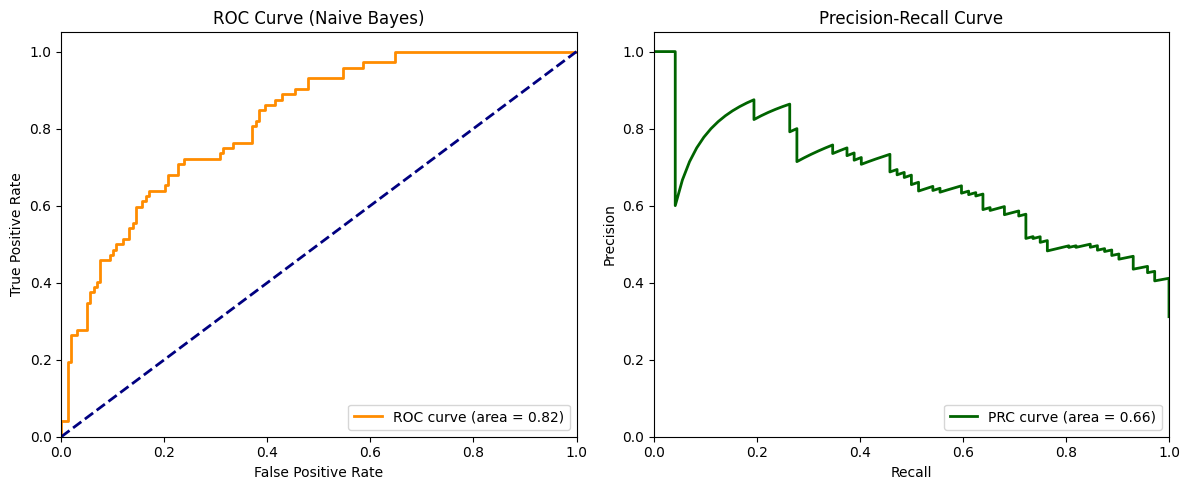

In [48]:
    plt.figure(figsize=(12, 5))

    # ROC Curve
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Naive Bayes)')
    plt.legend(loc="lower right")

    # PRC Curve
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='darkgreen', lw=2, label=f'PRC curve (area = {prc_auc:.2f})')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")

    plt.tight_layout()
    plt.savefig("naive_bayes_performance_curves.jpg")
    plt.show()


# **Random Forest classification**

**Imports**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             mean_absolute_error, mean_squared_error, matthews_corrcoef,
                             roc_curve, precision_recall_curve, auc)

**Load and Prepare Dataset**

In [52]:
data = pd.read_csv('diabetes.csv')
print("\nDataset head:")
print(data.head())

X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)



Dataset head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Train Random Forest Classifier**

In [53]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=30)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

**Evaluate Model Accuracy and Errors**

In [54]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy*100))
print("Confusion Matrix:\n", cm)

# Scaled confusion matrix to 230 instances
scaling_factor = 230 / np.sum(cm)
scaled_cm = cm * scaling_factor
print("\nScaled Confusion Matrix (230 instances):\n", scaled_cm)

acc_train = accuracy_score(y_train, rf_classifier.predict(X_train))
acc_test = rf_classifier.score(X_test, y_test)
print("\nTraining Accuracy: {:.2f}".format(acc_train))
print("Test Accuracy: {:.2f}".format(acc_test))

# Error rates
TN, FP, FN, TP = cm.ravel()
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print("\nError Rates:")
print("FPR: {:.4f}, FNR: {:.4f}, TPR: {:.4f}, TNR: {:.4f}".format(FPR, FNR, TPR, TNR))



Model Accuracy: 78.79%
Confusion Matrix:
 [[138  21]
 [ 28  44]]

Scaled Confusion Matrix (230 instances):
 [[137.4025974   20.90909091]
 [ 27.87878788  43.80952381]]

Training Accuracy: 1.00
Test Accuracy: 0.79

Error Rates:
FPR: 0.1321, FNR: 0.3889, TPR: 0.6111, TNR: 0.8679


**Metrics and Reports**

In [55]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("\nRegression Metrics:")
print("MAE: {:.4f}, RMSE: {:.4f}".format(mae, rmse))

y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]
mcc = matthews_corrcoef(y_test, np.round(y_pred_prob))
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
prc_auc = auc(recall, precision)

print("\nAdvanced Metrics:")
print("MCC: {:.4f}, ROC AUC: {:.4f}, PRC AUC: {:.4f}".format(mcc, roc_auc, prc_auc))



Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       159
           1       0.68      0.61      0.64        72

    accuracy                           0.79       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.78      0.79      0.78       231


Regression Metrics:
MAE: 0.2121, RMSE: 0.4606

Advanced Metrics:
MCC: 0.4934, ROC AUC: 0.8280, PRC AUC: 0.7070


**Visualizations**

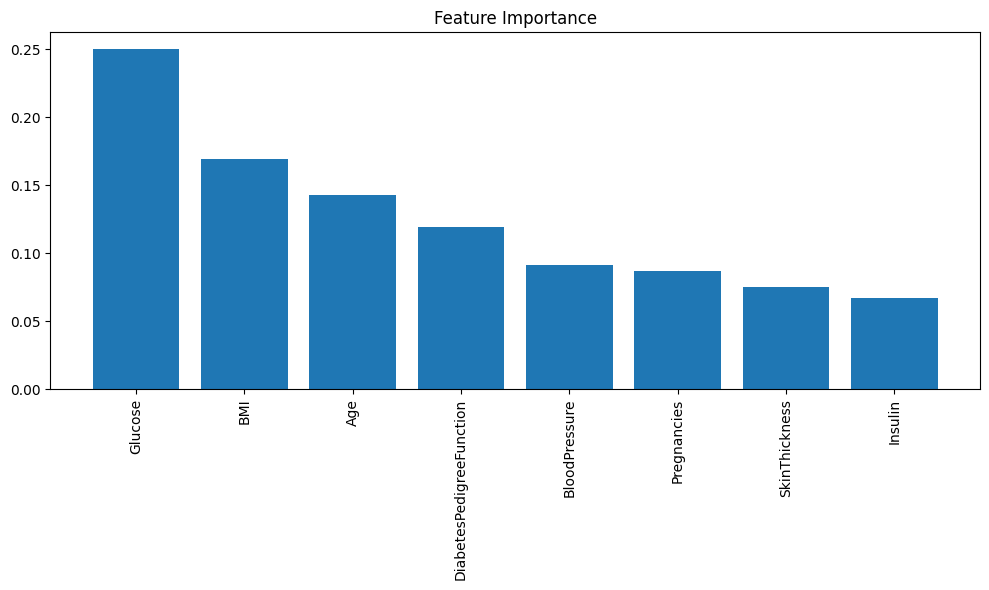

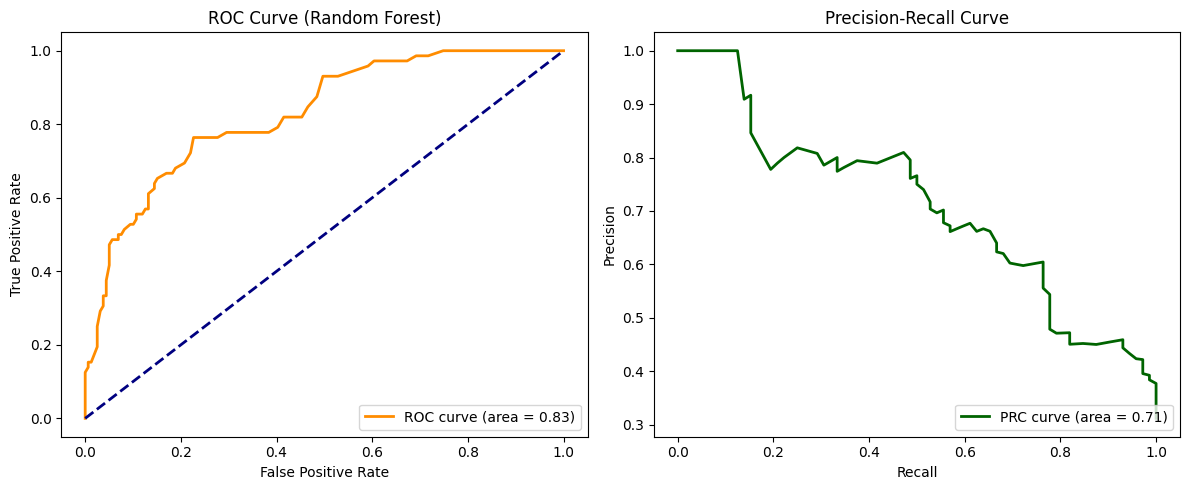

In [56]:
# Feature Importance
plt.figure(figsize=(10, 6))
importances = rf_classifier.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.savefig("random_forest_feature_importance.jpg")
plt.show()

# ROC and PRC Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='darkgreen', lw=2, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.savefig("random_forest_performance_curves.jpg")
plt.show()


**Weighted & Class-Specific Rates**

In [57]:
# Weighted
weighted_tp = TP * 0.7
weighted_fp = FP * 0.3
weighted_tp_rate = weighted_tp / (weighted_tp + FN)
weighted_fp_rate = weighted_fp / (weighted_fp + TN)
print("\nWeighted Rates:")
print("Weighted TP Rate: {:.4f}, Weighted FP Rate: {:.4f}".format(weighted_tp_rate, weighted_fp_rate))

# Class-specific
tn0, fp0, fn0, tp0 = cm.ravel()
tn1, fp1, fn1, tp1 = cm.ravel()[::-1]
tp_rate0 = tp0 / (tp0 + fn0)
fp_rate0 = fp0 / (fp0 + tn0)
tp_rate1 = tp1 / (tp1 + fn1)
fp_rate1 = fp1 / (fp1 + tn1)
print("\nClass-specific Rates:")
print("Class 0 - TP Rate: {:.4f}, FP Rate: {:.4f}".format(tp_rate0, fp_rate0))
print("Class 1 - TP Rate: {:.4f}, FP Rate: {:.4f}".format(tp_rate1, fp_rate1))



Weighted Rates:
Weighted TP Rate: 0.5238, Weighted FP Rate: 0.0437

Class-specific Rates:
Class 0 - TP Rate: 0.6111, FP Rate: 0.1321
Class 1 - TP Rate: 0.8679, FP Rate: 0.3889


**Average Performance**

In [58]:
avg_tp_rate = (tp_rate0 + tp_rate1) / 2
avg_fp_rate = (fp_rate0 + fp_rate1) / 2
print("\nAverage Rates:")
print("Average TP Rate: {:.4f}".format(avg_tp_rate))
print("Average FP Rate: {:.4f}".format(avg_fp_rate))



Average Rates:
Average TP Rate: 0.7395
Average FP Rate: 0.2605


# **Support Vector Machine**

**Imports**

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    mean_absolute_error,
    mean_squared_error,
    matthews_corrcoef,
    roc_curve,
    precision_recall_curve,
    auc,
)
import matplotlib.pyplot as plt


**Load and Prepare the Dataset**

In [ ]:
# Load the dataset
data = pd.read_csv('diabetes.csv')  # Replace with actual dataset path

# Split dataset into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


**Train SVM Model and Make Predictions**

In [60]:
# Train initial SVM model with linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)


**Basic Evaluation Metrics**

In [61]:
# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Accuracy (%):", accuracy * 100)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.7922077922077922
Accuracy (%): 79.22077922077922
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       159
           1       0.69      0.61      0.65        72

    accuracy                           0.79       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.79      0.79      0.79       231

Confusion Matrix:
 [[139  20]
 [ 28  44]]


**Confusion Matrix Scaling and Error Rates**

In [62]:
# Scale confusion matrix to 230 instances
scaling_factor = 230 / np.sum(conf_matrix)
conf_matrix = conf_matrix * scaling_factor
print("Scaled Confusion Matrix (230 instances):\n", conf_matrix)

# Extract values
TN, FP, FN, TP = conf_matrix.ravel()

# Error rates
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)


Scaled Confusion Matrix (230 instances):
 [[138.3982684   19.91341991]
 [ 27.87878788  43.80952381]]
False Positive Rate (FPR): 0.12578616352201258
False Negative Rate (FNR): 0.3888888888888889
True Positive Rate (TPR): 0.6111111111111112
True Negative Rate (TNR): 0.8742138364779874


**Regression-Like Error Metrics**

In [63]:
# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
rae = mae / (abs(y_test - y_test.mean()).sum())
rrse = mse / mse  # RRSE = 1

print("MAE:", mae)
print("RMSE:", rmse)
print("RAE:", rae)
print("RRSE:", rrse)


MAE: 0.2077922077922078
RMSE: 0.4558423058385518
RAE: 0.0020964360587002093
RRSE: 1.0


**Advanced Metrics**

In [64]:
# Retrain SVM with probability=True for ROC/PRC
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_decision = svm_model.decision_function(X_test)

# MCC
mcc = matthews_corrcoef(y_test, np.round(y_pred_decision))
print("MCC:", mcc)

# ROC and PRC curves
fpr, tpr, _ = roc_curve(y_test, y_pred_decision)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(y_test, y_pred_decision)
prc_auc = auc(recall, precision)

print("ROC AUC:", roc_auc)
print("PRC AUC:", prc_auc)


MCC: 0.06411976265105528
ROC AUC: 0.8327218728162125
PRC AUC: 0.7146791674183771


**Visualise**

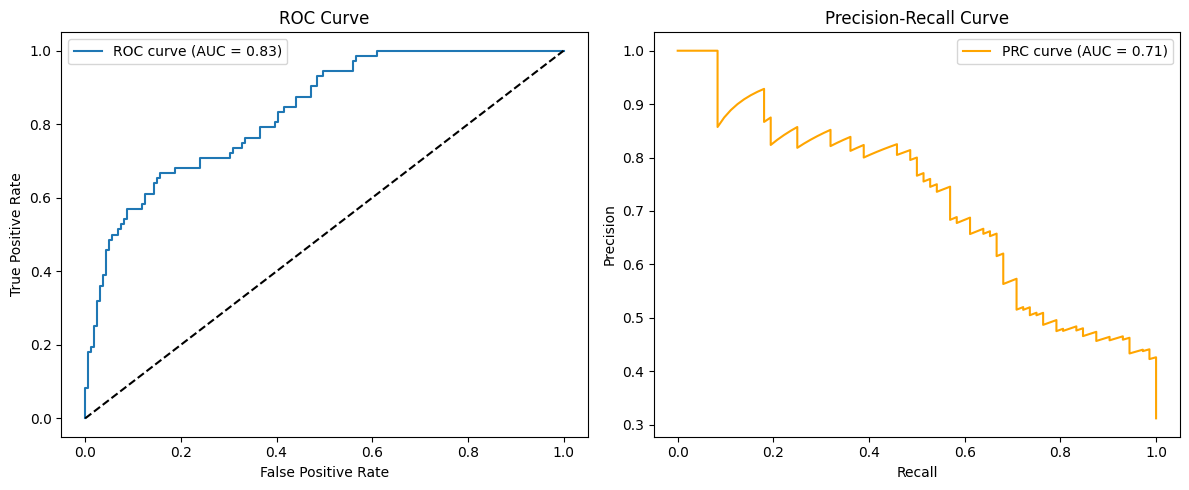

In [65]:
plt.figure(figsize=(12, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

# PRC Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f"PRC curve (AUC = {prc_auc:.2f})", color='orange')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()

plt.tight_layout()
plt.show()


# **Multilayer Perceptron**

**Imports**

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
import seaborn as sns  # For better confusion matrix visualization


**Learning Curve Plot Function**

In [67]:
def plot_learning_curve(history):
    """Plot neural network training history"""
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.loss_curve_, label='Training Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.validation_scores_, label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig("nn_learning_curve.jpg")
    plt.show()


**Build and Tune Neural Network**

In [68]:
def build_neural_network(X_train_scaled, y_train, X_test_scaled, y_test):
    """Build and tune neural network"""
    mlp = MLPClassifier(early_stopping=True, validation_fraction=0.2, random_state=30)

    param_grid = {
        'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01],
        'batch_size': [32, 64]
    }

    gs = GridSearchCV(mlp, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    gs.fit(X_train_scaled, y_train)

    best_nn = gs.best_estimator_

    print("\nBest Hyperparameters:")
    for param, value in gs.best_params_.items():
        print(f"{param}: {value}")

    return best_nn


**Load and Preprocess Dataset**

In [74]:

    # Load dataset
    data = pd.read_csv('diabetes.csv')
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]

    # Split into train/test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

    # Standard scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Build and tune neural network
    nn_model = build_neural_network(X_train_scaled, y_train, X_test_scaled, y_test)



Best Hyperparameters:
activation: tanh
alpha: 0.0001
batch_size: 64
hidden_layer_sizes: (64,)
learning_rate_init: 0.01


**Evaluate Model Performance**

In [75]:
    # Evaluate on test set
    y_pred = nn_model.predict(X_test_scaled)
    y_pred_prob = nn_model.predict_proba(X_test_scaled)[:, 1]

    print("\nEvaluation Metrics:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
    print(f"ROC AUC: {auc(*roc_curve(y_test, y_pred_prob)[:2]):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



Evaluation Metrics:
Accuracy: 77.06%
ROC AUC: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       159
           1       0.63      0.62      0.63        72

    accuracy                           0.77       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.77      0.77      0.77       231



**Confusion Matrix & Learning Curves**

In [ ]:
    # Confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.savefig("nn_confusion_matrix.jpg")
    plt.show()

    # Learning curve
    plot_learning_curve(nn_model)


**ROC and Precision-Recall Curves**

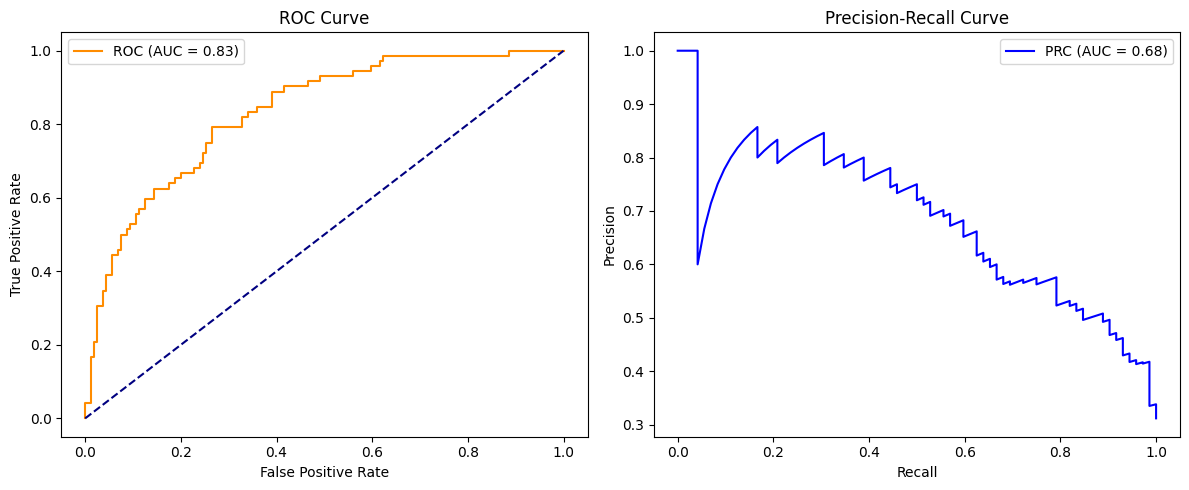

In [76]:
    # ROC and PR Curves
    plt.figure(figsize=(12, 5))

    # ROC
    plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color='darkorange', label=f'ROC (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()

    # PR Curve
    plt.subplot(1, 2, 2)
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(recall, precision, color='blue', label=f'PRC (AUC = {auc(recall, precision):.2f})')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    plt.tight_layout()
    plt.savefig("nn_performance_curves.jpg")
    plt.show()


**Decision Tree**



   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Accuracy: 0.7186147186147186
Confusion Matrix:
[[121  38]
 [ 27  45]]
Accuracy Percentage: 71.86147186147186

Scaled Confusion Matrix (230 instances):
[[120.47619048  37.83549784]
 [ 26.88311688  44.80519481]]

False Positive Rate (FPR): 0.2389937106918239
False Negative Rate (FNR): 0.3749999999999999

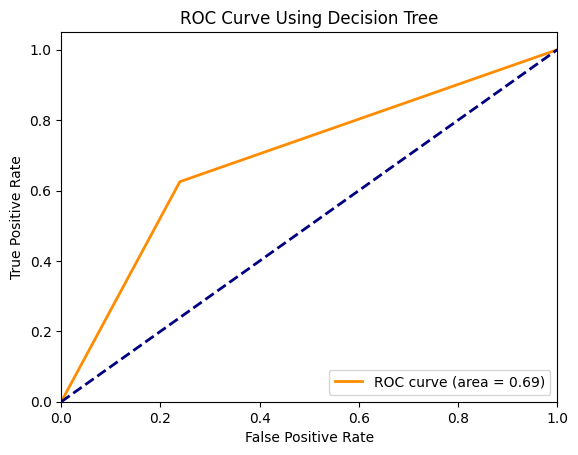

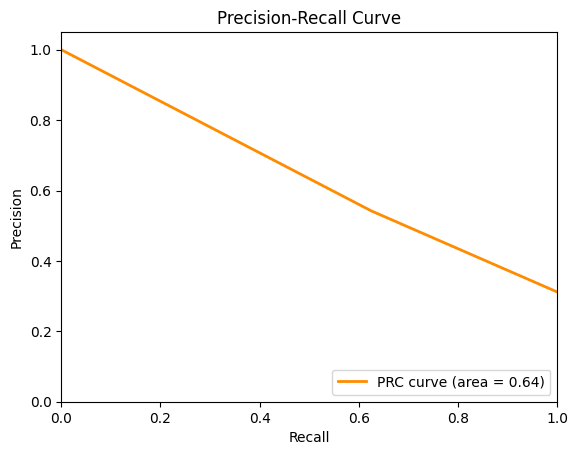


Class-specific Rates:
tp_rate0: 0.625
tp_rate1: 0.761006289308176
fp_rate0: 0.2389937106918239
fp_rate1: 0.37499999999999994

Weighted Rates:
weighted_tp_rate: 0.6930031446540881
weighted_fp_rate: 0.3069968553459119

Alternative Weighted Rates:
weighted_tp_rate: 0.5384615384615384
weighted_fp_rate: 0.08610271903323263


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import matthews_corrcoef, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('diabetes.csv')
print(data.head())

# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Train the model
model = DecisionTreeClassifier(random_state=30)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nAccuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy Percentage:", accuracy*100)

# Scale the confusion matrix to 230 instances
scaling_factor = 230 / np.sum(conf_matrix)
conf_matrix = conf_matrix * scaling_factor
print("\nScaled Confusion Matrix (230 instances):")
print(conf_matrix)

# Extract values from the confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Calculate error rates
FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print("\nFalse Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

# Calculate TPR and TNR
TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Weighted TPR and TNR
class_weights = y_test.value_counts(normalize=True)
weighted_tpr = (class_weights * TPR).sum()
weighted_tnr = (class_weights * TNR).sum()
print("\nWeighted TPR:", weighted_tpr)
print("Weighted TNR:", weighted_tnr)

# Different ERROR Rates
print("\nDifferent ERROR Rates:")
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

rae = mae / (abs(y_test - y_test.mean()).mean())
print("RAE:", rae)

# For RRSE, we need to compare against the variance of the actual values
rrse = rmse / np.sqrt(mean_squared_error(y_test, [y_test.mean()]*len(y_test)))
print("RRSE:", rrse)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate MCC and AUCs
mcc = matthews_corrcoef(y_test, np.round(y_pred_prob))
print("\nMCC:", mcc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
prc_auc = auc(recall, precision)
print("PRC AUC:", prc_auc)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Using Decision Tree')
plt.legend(loc="lower right")
plt.savefig("Decision_Tree_ROC.jpg")
plt.show()

# Plot PRC curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='PRC curve (area = %0.2f)' % prc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate class-specific rates
tn0, fp0, fn0, tp0 = conf_matrix.ravel()  # Class 0
tn1, fp1, fn1, tp1 = conf_matrix.ravel()[::-1]  # Class 1

tp_rate0 = tp0 / (tp0 + fn0)
fp_rate0 = fp0 / (fp0 + tn0)

tp_rate1 = tp1 / (tp1 + fn1)
fp_rate1 = fp1 / (fp1 + tn1)

print("\nClass-specific Rates:")
print("tp_rate0:", tp_rate0)
print("tp_rate1:", tp_rate1)
print("fp_rate0:", fp_rate0)
print("fp_rate1:", fp_rate1)

# Calculate weighted rates
weighted_tp_rate = (tp_rate0 + tp_rate1)/2
weighted_fp_rate = (fp_rate0 + fp_rate1)/2
print("\nWeighted Rates:")
print("weighted_tp_rate:", weighted_tp_rate)
print("weighted_fp_rate:", weighted_fp_rate)

# Alternative weighting using the original TP, FP values
weighted_tp = TP * 0.7
weighted_fp = FP * 0.3

weighted_tp_rate = weighted_tp / (weighted_tp + FN)
weighted_fp_rate = weighted_fp / (weighted_fp + TN)
print("\nAlternative Weighted Rates:")
print("weighted_tp_rate:", weighted_tp_rate)
print("weighted_fp_rate:", weighted_fp_rate)